<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the blood varied with sport, body size, and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
white blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [ ]:
# Set the number of threads to be 1 for K Means to proceed without warnings
import os
os.environ['OMP_NUM_THREADS'] = '1'


In [1]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### 1. Import the data

In [2]:
data = pd.read_csv('ais.csv', index_col=0)
print(data.head())
print(data.info())

    rcc  wcc    hc    hg  ferr    bmi    ssf  pcBfat    lbm     ht    wt sex  \
1  3.96  7.5  37.5  12.3    60  20.56  109.1   19.75  63.32  195.9  78.9   f   
2  4.41  8.3  38.2  12.7    68  20.67  102.8   21.30  58.55  189.7  74.4   f   
3  4.14  5.0  36.4  11.6    21  21.86  104.6   19.88  55.36  177.8  69.1   f   
4  4.11  5.3  37.3  12.6    69  21.88  126.4   23.66  57.18  185.0  74.9   f   
5  4.45  6.8  41.5  14.0    29  18.96   80.3   17.64  53.20  184.6  64.6   f   

    sport  
1  B_Ball  
2  B_Ball  
3  B_Ball  
4  B_Ball  
5  B_Ball  
<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 1 to 202
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rcc     202 non-null    float64
 1   wcc     202 non-null    float64
 2   hc      202 non-null    float64
 3   hg      202 non-null    float64
 4   ferr    202 non-null    int64  
 5   bmi     202 non-null    float64
 6   ssf     202 non-null    float64
 7   pcBfat  2

### 2. Do some EDA of relationships between features.

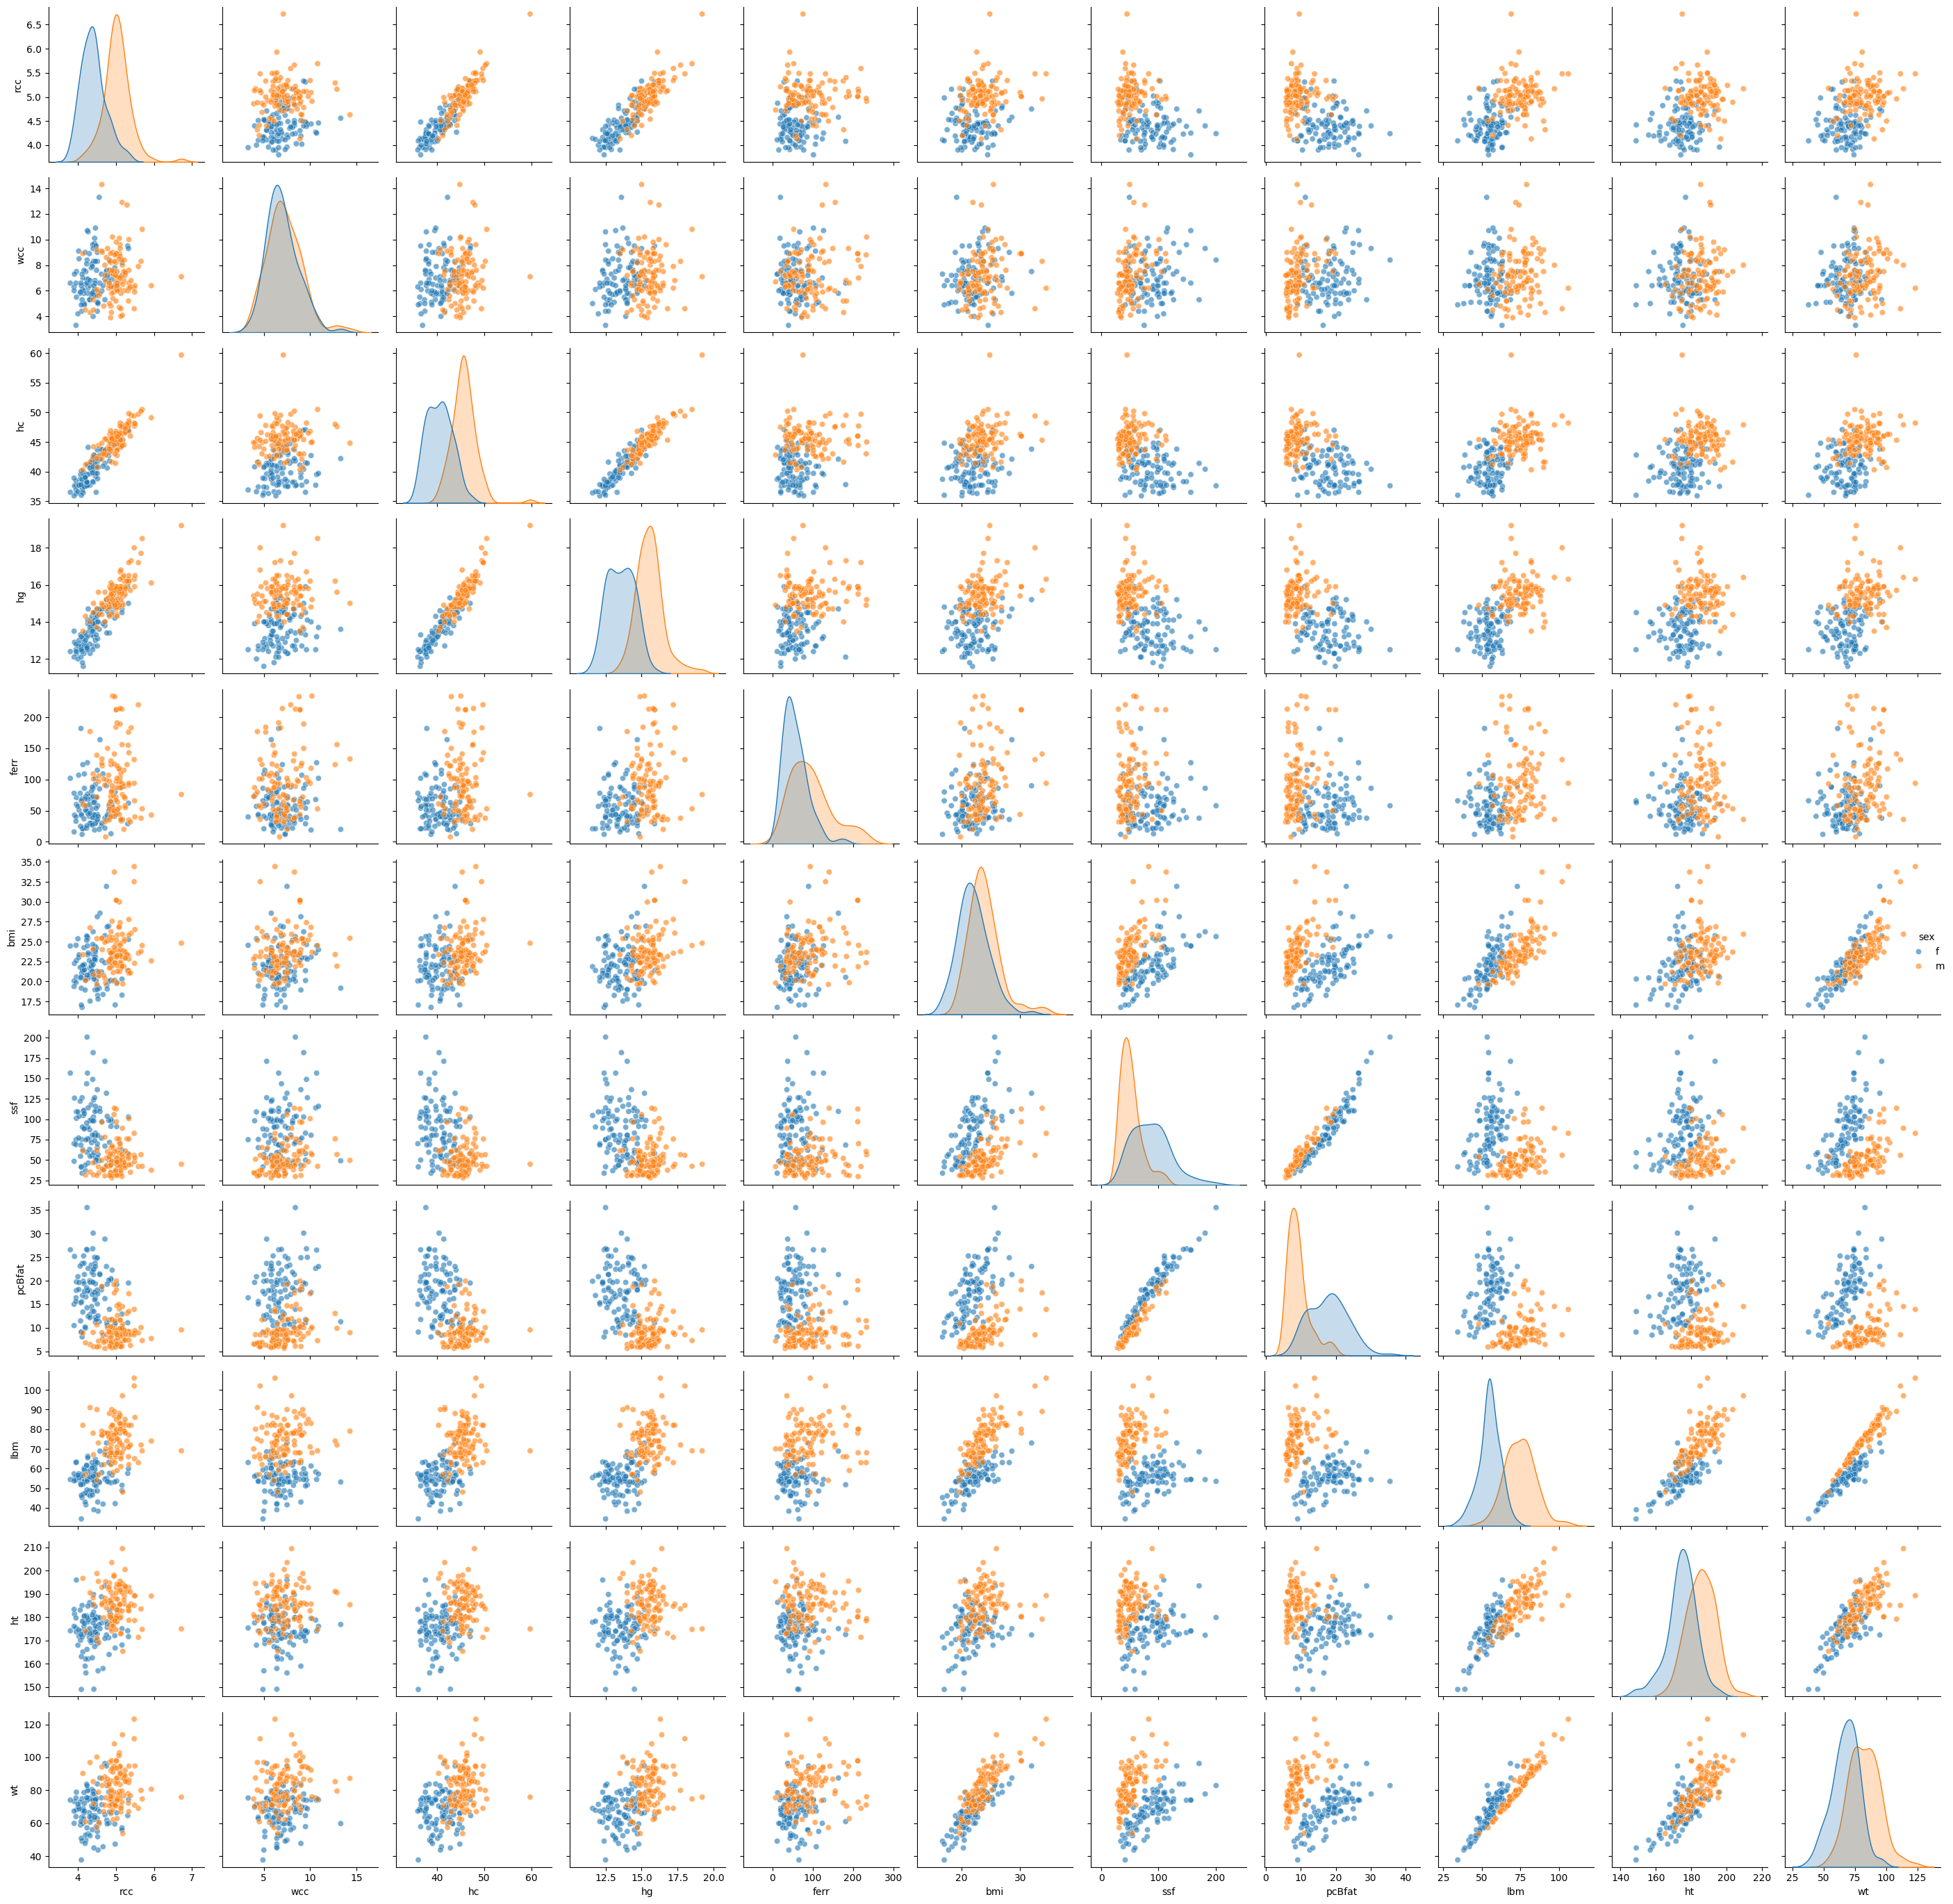

In [8]:
# Create a pair plot for numerical features
numerical_features = ['rcc', 'wcc', 'hc', 'hg', 'ferr', 'bmi', 'ssf', 'pcBfat', 'lbm', 'ht', 'wt']
sns.pairplot(data[numerical_features + ['sex']], hue='sex', plot_kws={'alpha': 0.6})
plt.tight_layout()
plt.show()

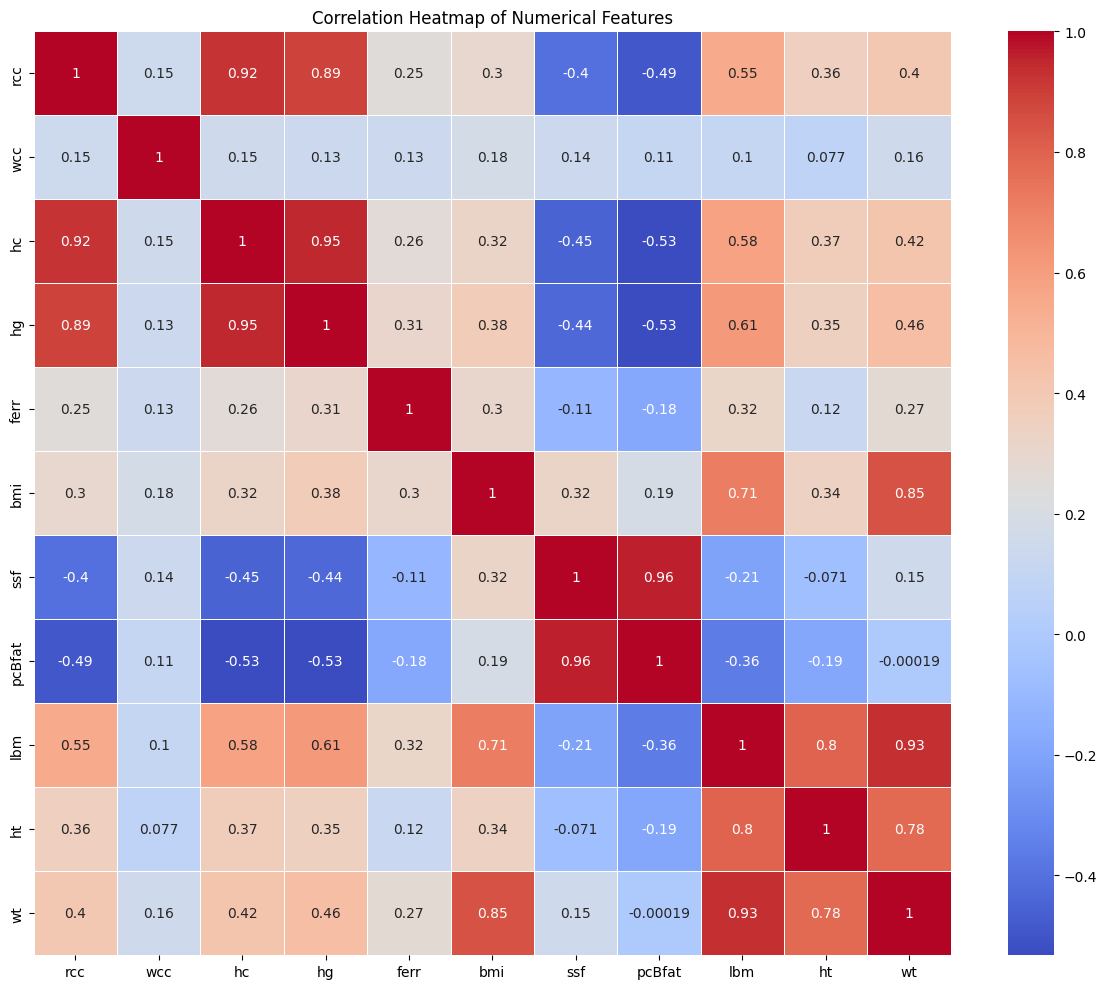

In [9]:
# Create a correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

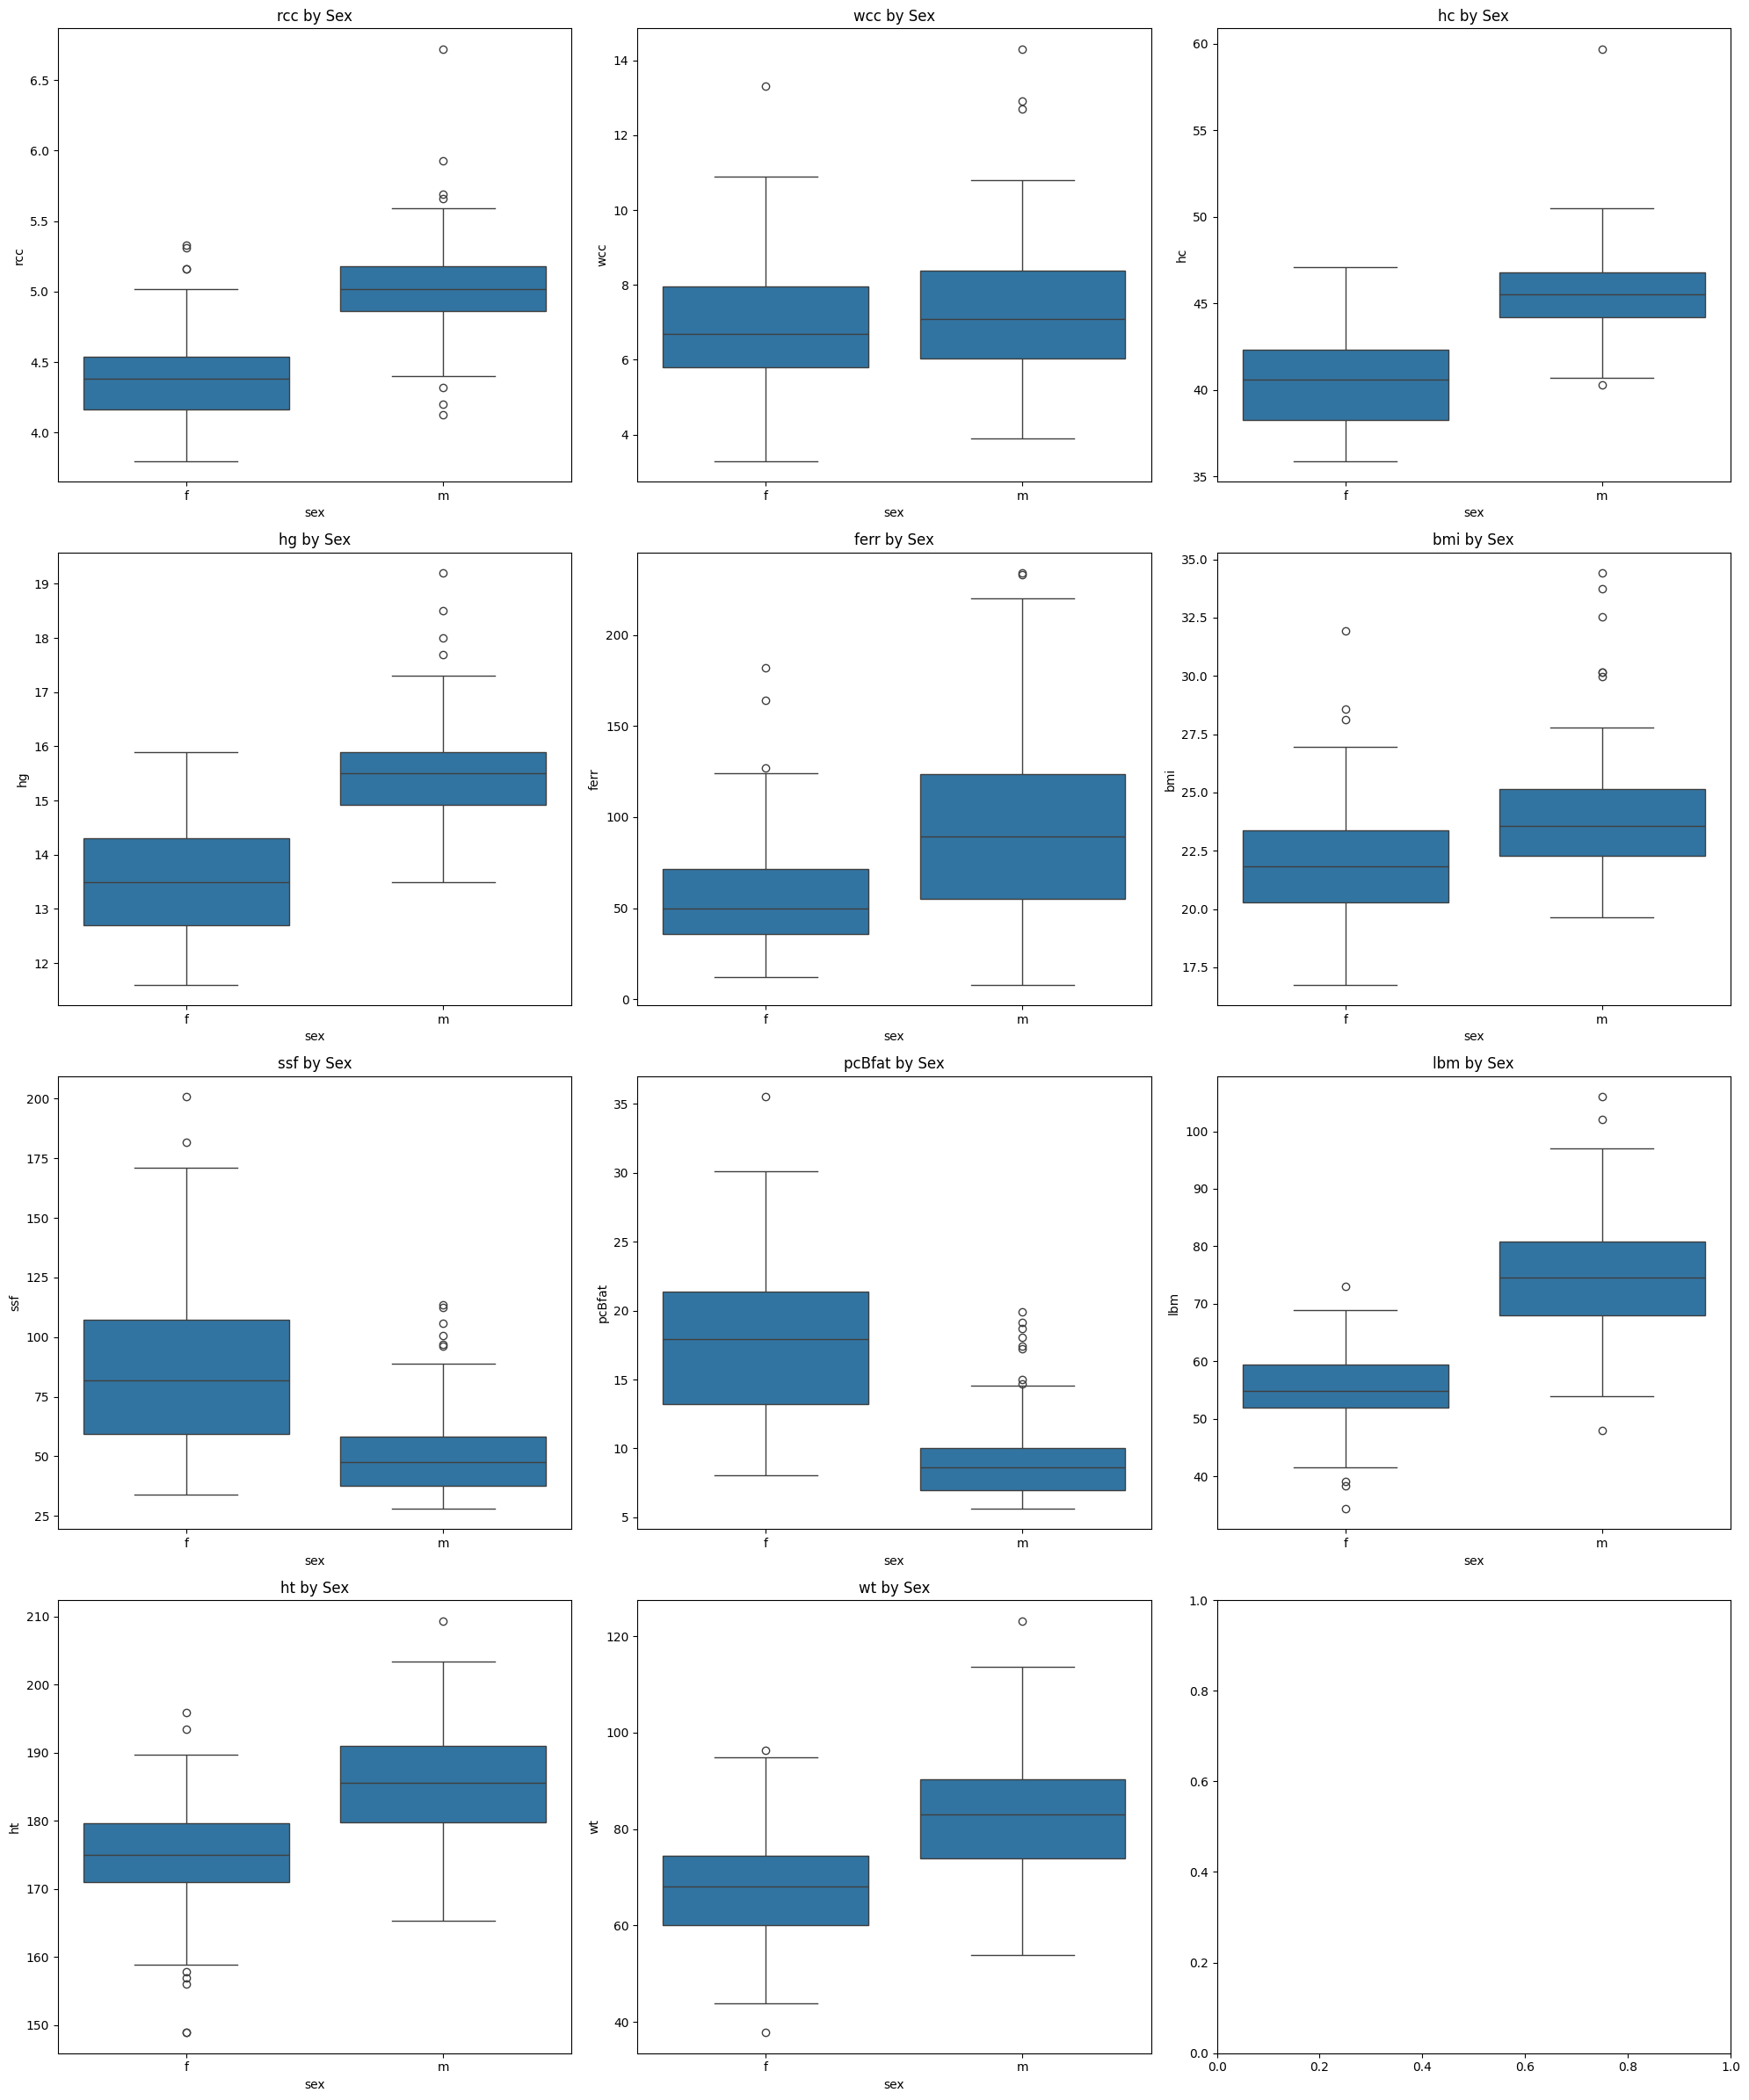

EDA visualizations have been displayed.


In [10]:
# Create box plots for each numerical feature by sex
fig, axes = plt.subplots(4, 3, figsize=(20, 24))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(x='sex', y=feature, data=data, ax=axes[i])
    axes[i].set_title(f'{feature} by Sex')

plt.tight_layout()
plt.show()

print("EDA visualizations have been displayed.")

### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [11]:
# ANSWER
# Remove 'sex' and 'sport' columns
data_for_clustering = data.drop(['sex', 'sport'], axis=1)

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

### 4. Clustering with K-Means

- Cluster the data to our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Let's try using 2, 4. Run the clustering algorithm with each of those k values.

In [12]:
# ANSWER
# Create a new DataFrame with scaled data
scaled_df = pd.DataFrame(scaled_data, columns=data_for_clustering.columns)

print(scaled_df.head())
print("\nShape of prepared data:", scaled_df.shape)

        rcc       wcc        hc        hg      ferr       bmi       ssf  \
0 -1.660563  0.217771 -1.530301 -1.667558 -0.356163 -0.838652  1.233760   
1 -0.675538  0.663236 -1.338725 -1.373240 -0.187328 -0.800148  1.039822   
2 -1.266553 -1.174308 -1.831348 -2.182615 -1.179234 -0.383603  1.095232   
3 -1.332221 -1.007259 -1.585037 -1.446820 -0.166223 -0.376602  1.766319   
4 -0.587981 -0.172011 -0.435584 -0.416707 -1.010399 -1.398713  0.347186   

     pcBfat       lbm        ht        wt  
0  1.011027 -0.119170  1.626719  0.280193  
1  1.262060 -0.485029  0.988226 -0.043765  
2  1.032082 -0.729702 -0.237268 -0.425315  
3  1.644279 -0.590108  0.504207 -0.007769  
4  0.669299 -0.895374  0.463014 -0.749273  

Shape of prepared data: (202, 11)


In [13]:
# Perform K-means clustering for k=2 and k=4
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_4 = KMeans(n_clusters=4, random_state=42)

# Fit the models and predict clusters
clusters_2 = kmeans_2.fit_predict(scaled_df)
clusters_4 = kmeans_4.fit_predict(scaled_df)

### 5. Get the labels for the models using the labels_ attribute.

In [14]:
# ANSWER
# Add cluster labels to the original dataframe
data['Cluster_2'] = clusters_2
data['Cluster_4'] = clusters_4

print("Clustering complete. Cluster labels added to the dataframe.")
print(data[['sex', 'Cluster_2', 'Cluster_4']].head(10))

Clustering complete. Cluster labels added to the dataframe.
   sex  Cluster_2  Cluster_4
1    f          0          2
2    f          0          2
3    f          0          2
4    f          0          2
5    f          0          0
6    f          0          0
7    f          0          2
8    f          0          2
9    f          0          2
10   f          0          0


### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero.

In [15]:
# ANSWER
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)


Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

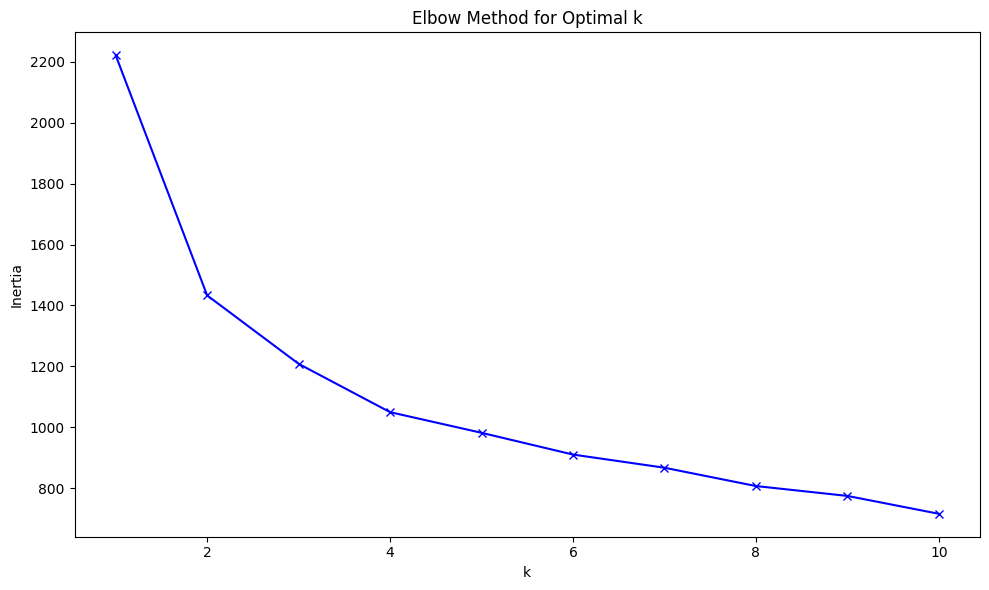

In [16]:
# ANSWER
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.tight_layout()
plt.show()

### 7. Plot `wt` vs. `pcBfat` using the clusters from each model.

- Plot wt, pcBfat using hue sex
- Plot wt, pcBfat using hue label

The labels calculated above can be a new column of the dataset.

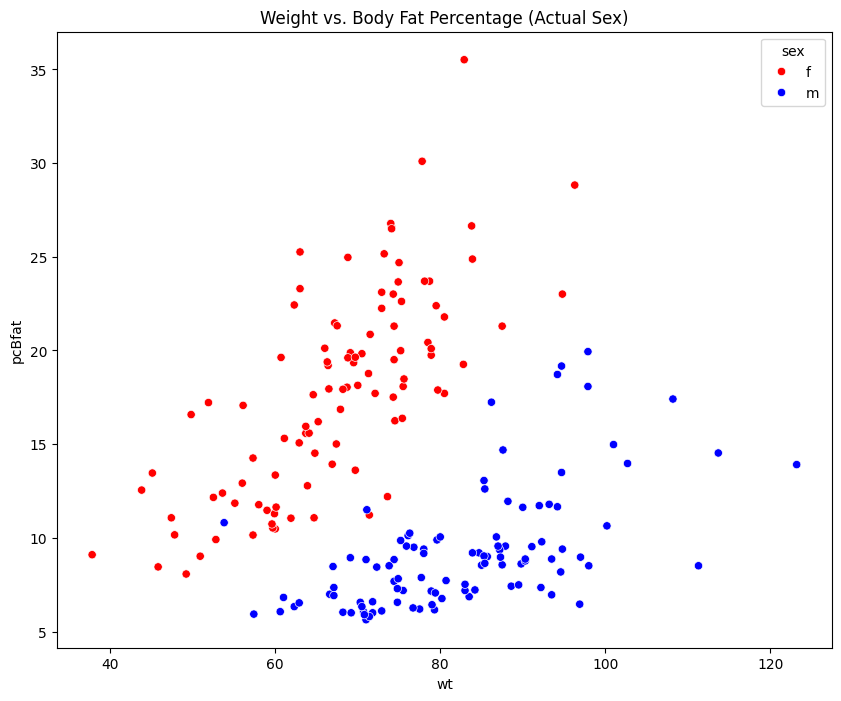

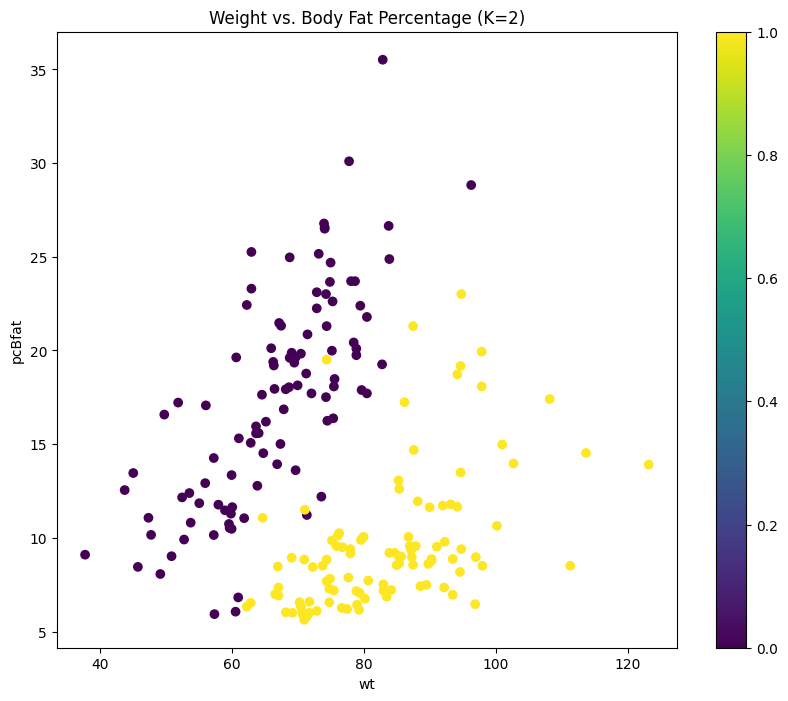

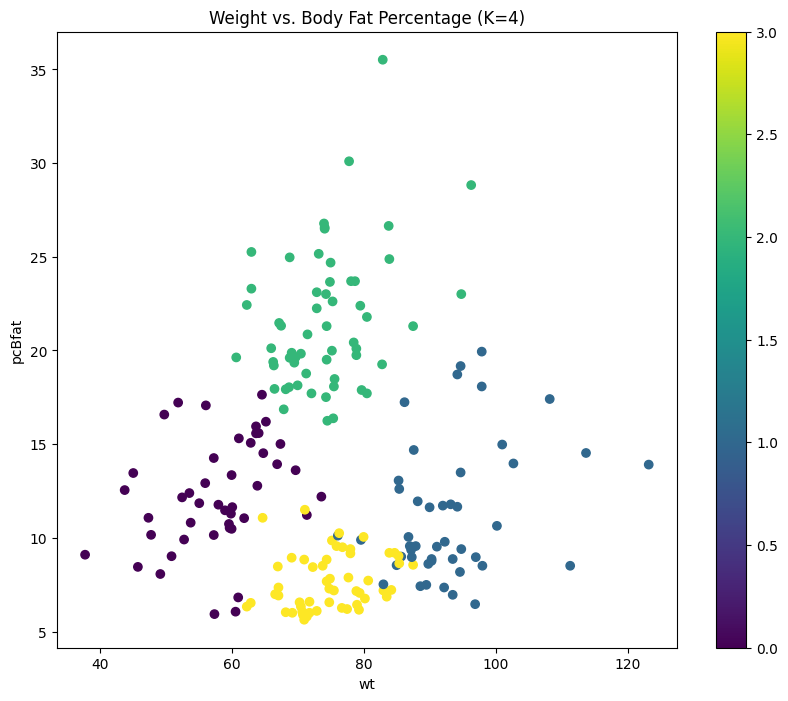

Clustering visualizations have been displayed.


In [19]:
# ANSWER
# Function to create scatter plot
def plot_clusters(x, y, clusters, title):
    plt.figure(figsize=(10, 8))
    
    if clusters == 'sex':
        # For 'sex', use a categorical color map
        sns.scatterplot(data=data, x=x, y=y, hue=clusters, palette=['red', 'blue'])
    else:
        # For numerical clusters, use a continuous color map
        scatter = plt.scatter(data[x], data[y], c=data[clusters], cmap='viridis')
        plt.colorbar(scatter)
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.show()

# Plot wt vs. pcBfat for actual sex
plot_clusters('wt', 'pcBfat', 'sex', 'Weight vs. Body Fat Percentage (Actual Sex)')

# Plot wt vs. pcBfat for k=2 clusters
plot_clusters('wt', 'pcBfat', 'Cluster_2', 'Weight vs. Body Fat Percentage (K=2)')

# Plot wt vs. pcBfat for k=4 clusters
plot_clusters('wt', 'pcBfat', 'Cluster_4', 'Weight vs. Body Fat Percentage (K=4)')

print("Clustering visualizations have been displayed.")



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



